In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

import datetime

import pylab  as pl 
import pandas as pd
import numpy  as np

In [2]:
index = pd.read_json("https://archive.analytics.mybinder.org/index.jsonl",
                     lines=True)

In [3]:
# get all days since start of June 2020.
now = datetime.datetime.now()
n   = (now - datetime.datetime(2020, 7, 1)).days

frames = []

count  = 0

for idx, day in index.sort_index(ascending=False).iterrows():
    df = pd.read_json("https://archive.analytics.mybinder.org/{}".format(day['name']), lines=True)
    frames.append(df)

    if len(frames) > n:
        break

    print(count, n)
    
    count += 1
        
print(f"Fetched data for {n} days.")

0 76
1 76
2 76
3 76
4 76
5 76
6 76
7 76
8 76
9 76
10 76
11 76
12 76
13 76
14 76
15 76
16 76
17 76
18 76
19 76
20 76
21 76
22 76
23 76
24 76
25 76
26 76
27 76
28 76
29 76
30 76
31 76
32 76
33 76
34 76
35 76
36 76
37 76
38 76
39 76
40 76
41 76
42 76
43 76
44 76
45 76
46 76
47 76
48 76
49 76
50 76
51 76
52 76
53 76
54 76
55 76
56 76
57 76
58 76
59 76
60 76
61 76
62 76
63 76
64 76
65 76
66 76
67 76
68 76
69 76
70 76
71 76
72 76
73 76
74 76
75 76
Fetched data for 76 days.


In [4]:
df = pd.concat(frames)

In [5]:
# make it easier to grab the ref
def get_repo(spec):
    s = spec.rsplit("/", 1)[0]
    if s.endswith('.git'):
        s = s[:-4]
    return s

df['repo'] = df['spec'].apply(get_repo) #lambda s: s.rsplit("/", 1)[0].replace(".git", ""))
df['org'] = df['spec'].apply(lambda s: s.split("/", 1)[0])

In [6]:
# take a look at the data, does it look sensible?
df.sample(10)

,timestamp,schema,version,provider,spec,ref,status,origin,repo,org
9464,2020-08-15 14:45:00+00:00,binderhub.jupyter.org/launch,4,GitHub,jupyterlab/jupyterlab-demo/try.jupyter.org,71b616307dcb9cba18262d8e5fa46ad828ca51e4,success,gke.mybinder.org,jupyterlab/jupyterlab-demo,jupyterlab
1226,2020-07-23 02:25:00+00:00,binderhub.jupyter.org/launch,4,GitHub,interstellarmedium/interstellarmedium.github.i...,28989fe3443e67e0e4ec008cf6162aee8802cec7,success,gke.mybinder.org,interstellarmedium/interstellarmedium.github.io,interstellarmedium
7340,2020-08-20 09:17:00+00:00,binderhub.jupyter.org/launch,4,GitHub,parth1902/app2/master,9f35449a813b8daa12c6ab1e651cfc6dd10d6e1d,success,gke.mybinder.org,parth1902/app2,parth1902
9375,2020-07-13 12:17:00+00:00,binderhub.jupyter.org/launch,4,GitHub,joelachance/thebelab-requirements/master,4f1bf6107b6755066a9f7d6bfcc9d9e3f86aa12b,success,gke.mybinder.org,joelachance/thebelab-requirements,joelachance
15668,2020-07-23 18:39:00+00:00,binderhub.jupyter.org/launch,4,GitHub,ipython/ipython-in-depth/master,7e5ce96cc9251083979efdfc393425f1229a4a68,success,gesis.mybinder.org,ipython/ipython-in-depth,ipython
12230,2020-07-18 20:02:00+00:00,binderhub.jupyter.org/launch,4,GitHub,jupyterlab/jupyterlab-demo/try.jupyter.org,71b616307dcb9cba18262d8e5fa46ad828ca51e4,success,gke.mybinder.org,jupyterlab/jupyterlab-demo,jupyterlab
11039,2020-08-29 15:04:00+00:00,binderhub.jupyter.org/launch,4,Git,https%3A%2F%2Fjovian.ml%2Fapi%2Fgit%2F6213bcb9...,fb8b5c097292a32d8a35281e6db69031e9e33c9c,success,gke.mybinder.org,https%3A%2F%2Fjovian.ml%2Fapi%2Fgit%2F6213bcb9...,https%3A%2F%2Fjovian.ml%2Fapi%2Fgit%2F6213bcb9...
7986,2020-08-13 10:56:00+00:00,binderhub.jupyter.org/launch,4,GitHub,explosion/spacy-io-binder/live,46f7d6ffd6ec206023fbbc23b7a879fde19b3498,success,ovh.mybinder.org,explosion/spacy-io-binder,explosion
5211,2020-08-19 06:57:00+00:00,binderhub.jupyter.org/launch,4,GitHub,jupyterlab/jupyterlab-demo/try.jupyter.org,71b616307dcb9cba18262d8e5fa46ad828ca51e4,success,gke.mybinder.org,jupyterlab/jupyterlab-demo,jupyterlab
347,2020-08-12 00:40:00+00:00,binderhub.jupyter.org/launch,4,GitHub,FrankBro/parsec/master,aca291e6cade93d9788d64cd9f35f5b71e85bd82,success,gke.mybinder.org,FrankBro/parsec,FrankBro


In [7]:
df = df.drop(columns=['schema', 'version', 'spec', 'ref'])

In [8]:
df.sample(10)

,timestamp,provider,status,origin,repo,org
9534,2020-08-29 13:37:00+00:00,GitHub,success,gke.mybinder.org,jupyterlab/jupyterlab-demo,jupyterlab
3588,2020-09-09 04:17:00+00:00,Git,success,gke.mybinder.org,https%3A%2F%2Fjovian.ml%2Fapi%2Fgit%2F48a31643...,https%3A%2F%2Fjovian.ml%2Fapi%2Fgit%2F48a31643...
1633,2020-09-03 02:12:00+00:00,GitHub,success,ovh.mybinder.org,evenhuis/maths_notebooks,evenhuis
10318,2020-09-08 09:30:00+00:00,GitHub,success,gke.mybinder.org,SamLau95/nbinteract,SamLau95
218,2020-07-27 00:32:00+00:00,GitHub,success,gesis.mybinder.org,ipython/ipython-in-depth,ipython
4129,2020-08-08 08:13:00+00:00,GitHub,success,gesis.mybinder.org,ipython/ipython-in-depth,ipython
22948,2020-09-03 20:44:00+00:00,GitHub,success,gke.mybinder.org,jupyterlab/jupyterlab-demo,jupyterlab
4701,2020-08-20 06:26:00+00:00,GitHub,success,gesis.mybinder.org,ipython/ipython-in-depth,ipython
10007,2020-08-27 10:39:00+00:00,GitHub,success,gke.mybinder.org,wshuyi/demo-spacy-text-processing,wshuyi
7617,2020-07-25 14:25:00+00:00,GitHub,success,gke.mybinder.org,jupyterlab/jupyterlab-demo,jupyterlab


In [9]:
np.any(df['repo'] == 'michaelJwilson/DESI-HighSchool')

True

In [10]:
ds = df[df['repo'] == 'michaelJwilson/DESI-HighSchool']

In [11]:
ds['pd_timestamp'] = pd.to_datetime(ds.timestamp)

/Users/MJWilson/opt/miniconda3/envs/desihigh/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
ds.sort_values(by='pd_timestamp')

,timestamp,provider,status,origin,repo,org,pd_timestamp
2953,2020-07-09 04:59:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-07-09 04:59:00+00:00
2980,2020-07-09 05:03:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-07-09 05:03:00+00:00
3015,2020-07-09 05:04:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-07-09 05:04:00+00:00
3108,2020-07-09 05:12:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-07-09 05:12:00+00:00
3107,2020-07-09 05:12:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-07-09 05:12:00+00:00
...,...,...,...,...,...,...,...
26725,2020-09-15 21:56:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-09-15 21:56:00+00:00
26740,2020-09-15 21:57:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-09-15 21:57:00+00:00
27026,2020-09-15 22:17:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-09-15 22:17:00+00:00
27031,2020-09-15 22:18:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-09-15 22:18:00+00:00


In [13]:
daily = ds.set_index("timestamp").resample('D').count()

In [14]:
daily.head()

,provider,status,origin,repo,org,pd_timestamp
timestamp,,,,,,
2020-07-09 00:00:00+00:00,9,9,9,9,9,9
2020-07-10 00:00:00+00:00,0,0,0,0,0,0
2020-07-11 00:00:00+00:00,3,3,3,3,3,3
2020-07-12 00:00:00+00:00,0,0,0,0,0,0
2020-07-13 00:00:00+00:00,11,11,11,11,11,11


In [15]:
daily.tail()

,provider,status,origin,repo,org,pd_timestamp
timestamp,,,,,,
2020-09-11 00:00:00+00:00,16,16,16,16,16,16
2020-09-12 00:00:00+00:00,1,1,1,1,1,1
2020-09-13 00:00:00+00:00,1,1,1,1,1,1
2020-09-14 00:00:00+00:00,3,3,3,3,3,3
2020-09-15 00:00:00+00:00,20,20,20,20,20,20


Text(0.5, 0, '')

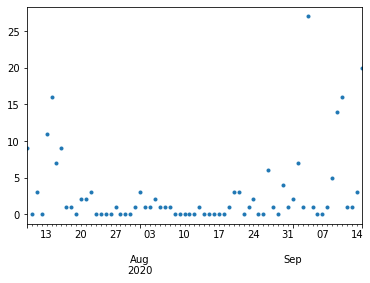

In [16]:
daily['repo'].plot(marker='.', lw=0.)

ax = pl.gca()

ax.set_xlabel('')

In [17]:
np.sum(daily['repo'])

198